In [58]:
from math import sqrt, pi, log, exp, floor
import matplotlib.pyplot as plt
import numpy as np
np.__version__
np.set_printoptions(suppress=True)

各电缆间距函数

In [71]:
def cal_dis(row, column, typeCircuit, S1, S2, S3, GMRs, rowLength, columnLength):
    numberCircuit = row * column  # 回路个数，n
    numberCable = 3 * numberCircuit  # 电缆数目，3×n
    coorCable = np.zeros((numberCable, 2))  # 电缆坐标，以第一根电缆为原点，向上和左为正方向
    
    plt.title('Coor Cable') 
    plt.xlabel('X')  
    plt.ylabel('Y')  
    for i in range(row):  # 行 matlab下标从1开始，numpy下标从0开始
        for j in range(column):  # 列
            temp1 = i * column + j  # 第几个回路
            temp2 = temp1 * 3  # 该回路的第一根电缆，上或者中间
            if typeCircuit[temp1, 0] == 1:  # 对于三角形排列
                coorCable[temp2, 0] = np.sum(rowLength[0:j])
                coorCable[temp2, 1] = np.sum(columnLength[0:i])  
                coorCable[temp2 + 1, 0] = coorCable[temp2, 0] - 0.5 * S2
                coorCable[temp2 + 1, 1] = coorCable[temp2, 1] - sqrt(S1**2 - (0.5 * S2)**2)
                coorCable[temp2 + 2, 0] = coorCable[temp2, 0] + 0.5 * S2
                coorCable[temp2 + 2, 1] = coorCable[temp2, 1] - sqrt(S1**2 - (0.5 * S2)**2)
                plt.plot(coorCable[temp2, :],coorCable[temp2, 1], ':')  
            else:
                coorCable[temp2, 0] = np.sum(rowLength[0:j])
                coorCable[temp2, 1] = np.sum(columnLength[0:i])
                coorCable[temp2 + 1, 0] = coorCable[temp2, 0] - S3
                coorCable[temp2 + 1, 1] = coorCable[temp2, 1]
                coorCable[temp2 + 2, 0] = coorCable[temp2, 0] + S3
                coorCable[temp2 + 2, 1] = coorCable[temp2, 1]
    plt.plot(coorCable[:,0],coorCable[:,1], 'o')    
    plt.show()
    print('coorCable', coorCable)
    distance = np.zeros((numberCable, numberCable))

    for i in range(numberCable):
        for j in range(numberCable):
            if i != j:
                distance[i, j] = sqrt((coorCable[i, 0] - coorCable[j, 0])**2 +
                                      (coorCable[i, 1] - coorCable[j, 1])**2)
            else:
                distance[i, j] = GMRs

    return distance

初始化参数

In [72]:
row = 2  # 回路排列的行数
column = 2  # 回路排列的列数
numberCircuit = row * column  # 回路个数，n
numberCable = 3 * numberCircuit  # 电缆总数目，3×n

# 各回路的类型(列向量,三角型输入1，直线型输入2)
typeCircuit = np.ones((numberCircuit, 1), dtype=int)  # [1;1;1;1]

Di = 92.8 # 电缆金属护套内直径/mm
Do = 97.6 # 电缆金属护套外直径/mm
S1 = 302  # 回路内三角形腰长，或直线型相邻电缆间距/mm
S2 = 500  # 三角形底长/mm
S3 = 540  # 一字型回路内相邻相之间的距离/mm
GMRs = sqrt(Di*Do)/2  # 电缆的金属护套的几何平均半径，/mm,可用护套的内外径的平均值代替

R1 = 1  # 一端口接地电阻/Ω
R2 = 10  # 二端口接地电阻/Ω
EarthResistivity = 200  # 大地电阻率/Ω*m
RSheathUint = 0.2076  # 护套单位电阻/Ω/km

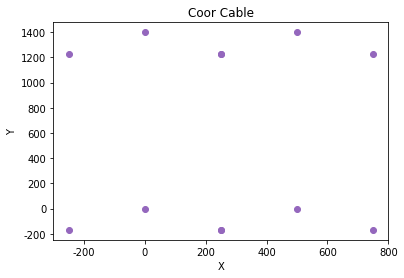

coorCable [[   0.            0.        ]
 [-250.         -169.42254868]
 [ 250.         -169.42254868]
 [ 500.            0.        ]
 [ 250.         -169.42254868]
 [ 750.         -169.42254868]
 [   0.         1400.        ]
 [-250.         1230.57745132]
 [ 250.         1230.57745132]
 [ 500.         1400.        ]
 [ 250.         1230.57745132]
 [ 750.         1230.57745132]]


In [73]:
rowLength = np.ones((column, 1)) # 第一行中相邻回路之间的距离
rowLength = rowLength * 500
columnLength = np.ones((row, 1)) # 第一列中相邻回路之间的距离
columnLength = columnLength * 1400

distance = cal_dis(row, column, typeCircuit, S1, S2, S3, GMRs, rowLength, columnLength)  # 各电缆间距

In [5]:
print('各电缆间距:', distance)

各电缆间距: [[  47.58487155  302.          302.          500.          302.
   768.8979126  1400.         1255.71527971 1255.71527971 1486.60687473
  1255.71527971 1441.11792151]
 [ 302.           47.58487155  500.          768.8979126   500.
  1000.         1589.20959483 1400.         1486.60687473 1739.42149472
  1486.60687473 1720.46505341]
 [ 302.          500.           47.58487155  302.            0.
   500.         1589.20959483 1486.60687473 1400.         1589.20959483
  1400.         1486.60687473]
 [ 500.          768.8979126   302.           47.58487155  302.
   302.         1486.60687473 1441.11792151 1255.71527971 1400.
  1255.71527971 1255.71527971]
 [ 302.          500.            0.          302.           47.58487155
   500.         1589.20959483 1486.60687473 1400.         1589.20959483
  1400.         1486.60687473]
 [ 768.8979126  1000.          500.          302.          500.
    47.58487155 1739.42149472 1720.46505341 1486.60687473 1589.20959483
  1486.60687473 1400. 

交叉互联三段长度

In [6]:
length = np.ones((numberCircuit, 3))
length[0] = [0.63, 0.647, 0.632]
length[1] = [0.492, 0.616, 0.580]
length[2] = [0.484, 0.484, 0.484]
length[3] = [0.484, 0.484, 0.484]
print('交叉互联三段长度', length)
lengthAll = np.zeros((numberCircuit, 1))  # 电缆总长/km
for num in range(numberCircuit):
    lengthAll[num, 0] = np.sum(length[num])
print('电缆总长度', lengthAll)

交叉互联三段长度 [[0.63  0.647 0.632]
 [0.492 0.616 0.58 ]
 [0.484 0.484 0.484]
 [0.484 0.484 0.484]]
电缆总长度 [[1.909]
 [1.688]
 [1.452]
 [1.452]]


每一相电缆的负载电流

In [7]:
IA=np.ones((numberCircuit,1))
IA[0] = 200
IA[1] = 150
IA[2] = 200
IA[3] = 200
print('电流', IA)
ILoad = np.zeros((numberCable,1), dtype=complex)
for num in range(0, numberCable, 3):
    ILoad[num, 0] = IA[floor(num/3), 0]  # A相负载电流
    ILoad[num + 1, 0] = -0.5 * IA[floor(num/3), 0] - sqrt(3) / 2 * IA[floor(num/3), 0] * 1j  # B相负载电流
    ILoad[num + 2, 0] = -0.5 * IA[floor(num/3), 0] + sqrt(3) / 2 * IA[floor(num/3), 0] * 1j  # C相负载电流
print('负载电流', ILoad)

电流 [[200.]
 [150.]
 [200.]
 [200.]]
负载电流 [[ 200.  +0.j        ]
 [-100.-173.20508076j]
 [-100.+173.20508076j]
 [ 150.  +0.j        ]
 [ -75.-129.90381057j]
 [ -75.+129.90381057j]
 [ 200.  +0.j        ]
 [-100.-173.20508076j]
 [-100.+173.20508076j]
 [ 200.  +0.j        ]
 [-100.-173.20508076j]
 [-100.+173.20508076j]]


计算右端感应电压

In [8]:
print(GMRs)
frequency = 50  # 负载电流频率
w = 2 * pi * frequency
ULoad = np.zeros((numberCable, 1), dtype=complex)
fluxAll = np.zeros((numberCable, 1), dtype=complex)  # 计算每一根电缆的总磁通/(Wb/km)
E = np.zeros((numberCable, 1), dtype=complex)  # 每根电缆单位长度的感应电动势/V/km
for num in range(numberCable):
    for j in range(numberCable):
        fluxAll[num, 0] = fluxAll[num, 0] + 2 * (10**(-4)) * ILoad[j, 0] * log(distance[num, j] / GMRs)
    E[num, 0] = -w * fluxAll[num, 0] * 1j
print('E', E)
print('length', length)
for num in range(numberCircuit):  # 回路数
    for j in range(3):  # 相数
        if j == 0:
            ULoad[num * 3 + j, 0] = E[0 + 3 * num, 0] * length[num, 0] + E[1 + 3 * num,0] * length[num, 1] + E[2 + 3 * num, 0] * length[num, 2]
        elif j == 1:
            ULoad[num * 3 + j, 0] = E[1 + 3 * num, 0] * length[num, 0] + E[2 + 3 * num,0] * length[num, 1] + E[0 + 3 * num, 0] * length[num, 2]
        elif j == 2:
            ULoad[num * 3 + j, 0] = E[2 + 3 * num, 0] * length[num, 0] + E[0 + 3 * num,0] * length[num, 1] + E[1 + 3 * num, 0] * length[num, 2]

UR = ULoad.real  # 负载感应电压实部
UF = ULoad.imag  # 负载感应电压虚部
U = np.transpose([np.append(UR, UF)])  # 6n×1

47.58487154548176


ValueError: math domain error

In [ ]:
print('负载感应电压:', U)

计算R矩阵

In [ ]:
# 计算R矩阵
De = sqrt(exp(12.981) * EarthResistivity / frequency) * 1000  # 护套等值深度/mm
R = np.zeros((numberCable, numberCable))  # 3n×3n
for num in range(numberCable):
    circuitIndex = floor(num/3)
    REarth = (pi**2) * frequency * 0.0001 * (lengthAll[circuitIndex,0] + 2 * De * (10**(-6)))
    RA = R1 + R2 + REarth + RSheathUint * lengthAll[circuitIndex,0]
    RB = R1 + R2 + REarth
    if num % 3 == 0:  # A相
        R[num, num] = RA
        R[num, num + 1] = RB
        R[num, num + 2] = RB
    elif num % 3 == 1:  # B相
        R[num, num] = RA
        R[num, num + 1] = RB
        R[num, num - 1] = RB
    elif num % 3 == 2:  # C相
        R[num, num] = RA
        R[num, num - 1] = RB
        R[num, num - 2] = RB

In [ ]:
print('R:', R)

计算Xa，即X的元素,对角线为自感,注意都要乘以长度

In [ ]:
# 计算Xa，即X的元素,对角线为自感,注意都要乘以长度
X = np.zeros((numberCable, numberCable))  # 感抗矩阵，3n×3n
for num1 in range(numberCable):  # 计算第num1根电缆的X矩阵元素
    circuitIndex = floor(num1/3)
    for num2 in range(numberCable):  # 计算第num2根电缆Isnum2的Xa系数
        # 先判断num1和num2分别是哪一相电缆，0到2表示A到C
        temp1 = num1 % 3
        temp2 = num2 % 3
        # 根据判断结果分类计算X
        if temp1 == temp2:  # 如果都是同一相
            if num1 != num2:  # 如果不是同一根电缆
                X[num1, num2] = 2 * w * 10**(-4) * log(
                    De / distance[num1, num2]) * lengthAll[circuitIndex, 0]
            else:  # 相等对角线，为自感
                X[num1, num2] = 2 * w * 10**(-4) * log(De / GMRs) * lengthAll[circuitIndex, 0]
        else:  # 如果不是同一相电缆
            XTemp = np.zeros((1, 3))  # 与三段长度对应的单位互感
            if temp1 == 0 and temp2 == 1:  # A与B
                XTemp[0, 0] = 2 * w * 10**(-4) * log(
                    De / distance[num1, num2])  # AB
                XTemp[0, 1] = 2 * w * 10**(-4) * log(
                    De / distance[num1 + 1, num2 + 1])  # BC
                XTemp[0, 2] = 2 * w * 10**(-4) * log(
                    De / distance[num1 + 2, num2 - 1])  # CA
            if temp1 == 0 and temp2 == 2:  # A与C
                XTemp[0, 0] = 2 * w * 10**(-4) * log(
                    De / distance[num1, num2])  # AC
                XTemp[0, 1] = 2 * w * 10**(-4) * log(
                    De / distance[num1 + 1, num2 - 2])  # BA
                XTemp[0, 2] = 2 * w * 10**(-4) * log(
                    De / distance[num1 + 2, num2 - 1])  # CB
            if temp1 == 1 and temp2 == 0:  # B与A
                XTemp[0, 0] = 2 * w * 10**(-4) * log(
                    De / distance[num1, num2])  # BA
                XTemp[0, 1] = 2 * w * 10**(-4) * log(
                    De / distance[num1 + 1, num2 + 1])  # CB
                XTemp[0, 2] = 2 * w * 10**(-4) * log(
                    De / distance[num1 - 1, num2 + 2])  # AC
            if temp1 == 1 and temp2 == 2:  # B与C
                XTemp[0, 0] = 2 * w * 10**(-4) * log(
                    De / distance[num1, num2])  # BC
                XTemp[0, 1] = 2 * w * 10**(-4) * log(
                    De / distance[num1 + 1, num2 - 2])  # CA
                XTemp[0, 2] = 2 * w * 10**(-4) * log(
                    De / distance[num1 - 1, num2 - 1])  # AB
            if temp1 == 2 and temp2 == 0:  # C与A
                XTemp[0, 0] = 2 * w * 10**(-4) * log(
                    De / distance[num1, num2])  # CA
                XTemp[0, 1] = 2 * w * 10**(-4) * log(
                    De / distance[num1 - 2, num2 + 1])  # AB
                XTemp[0, 2] = 2 * w * 10**(-4) * log(
                    De / distance[num1 - 1, num2 + 2])  # BC
            if temp1 == 2 and temp2 == 1:  # C与B
                XTemp[0, 0] = 2 * w * 10**(-4) * log(
                    De / distance[num1, num2])  # CB
                XTemp[0, 1] = 2 * w * 10**(-4) * log(
                    De / distance[num1 - 2, num2 + 1])  # AC
                XTemp[0, 2] = 2 * w * 10**(-4) * log(
                    De / distance[num1 - 1, num2 - 1])  # BA
            X[num1, num2] = XTemp[0, 0] * length[circuitIndex, 0] + XTemp[0, 1] * length[
                circuitIndex, 1] + XTemp[0, 2] * length[circuitIndex, 2]

In [ ]:
print('X', X)

AI=U

In [ ]:
# AI=U
A = np.vstack((np.hstack((R, -X)), np.hstack((X, R))))  # 6n×6n
I = np.linalg.inv(A) @ U  # 6n×1，先所有环流的实部，再是说有的虚部
ICircular = np.zeros((numberCable, 1))  # 记录每根电缆的环流值,3n×1
for num in range(numberCable):
    ICircular[num, 0] = sqrt((I[num, 0]**2) + (I[num + numberCable, 0]**2))
    temp1 = floor(num / 3)  # 第几个回路
    temp2 = num % 3  # 该回路中ABC三相
    print('回路{0}中{1}相的环流为{2}A'.format(temp1, temp2, ICircular[num, 0]))